In [ ]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## GARCH(2,2) Model


$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [ ]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

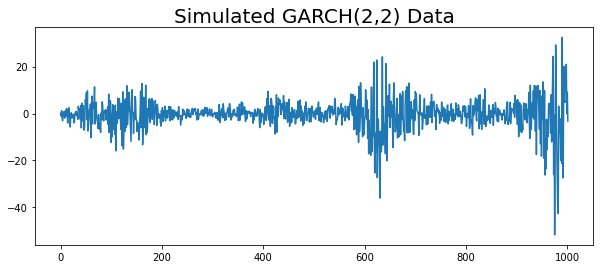

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)


Text(0.5, 1.0, 'Data Volatility')

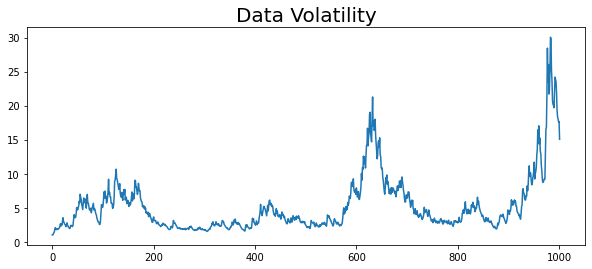

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

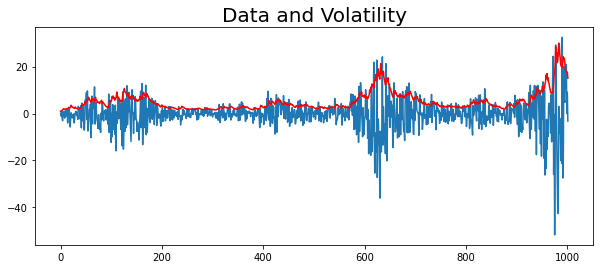

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

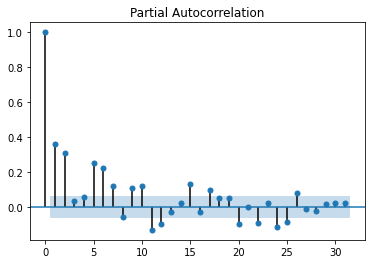

In [ ]:
plot_pacf(np.array(series)**2)
plt.show()

In [ ]:
train, test = series[:-test_size], series[-test_size:]

In [ ]:

model = arch_model(train, p=2, q=2)

In [ ]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 47415320997.49456
Iteration:      2,   Func. Count:     17,   Neg. LLF: 415473.8038916949
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2490.749377458247
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2469.592656215982
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2514.8474291715256
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2488.0206825474484
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2452.2086952875306
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2460.8533771835
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2450.528036657607
Iteration:     10,   Func. Count:     81,   Neg. LLF: 2450.279407064322
Iteration:     11,   Func. Count:     89,   Neg. LLF: 2450.243134878311
Iteration:     12,   Func. Count:     97,   Neg. LLF: 2454.3137108950586
Iteration:     13,   Func. Count:    106,   Neg. LLF: 2450.217375563675
Iteration:     14,   Func. Count:    113,   Neg. LLF: 2450.216

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2450.22
Distribution:                  Normal   AIC:                           4912.43
Method:            Maximum Likelihood   BIC:                           4941.26
                                        No. Observations:                  902
Date:                Tue, Sep 13 2022   Df Residuals:                      901
Time:                        09:55:45   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0954  8.983e-02     -1.062      0.288 [ -0.271,8.069e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2964      0.125      2.378  1.741e-02  [5.211e-02,  0.541]
alpha[1]       0.0723  2.976e-02      2.428  1.518e-02  [1.393e-02,  0.131]
alpha[2]       0.2049  3.667e-02      5.587  2.306e-08    [  0.133,  0.277]
beta[1]        0.1211  8.577e-02      1.412      0.158 [-4.701e-02,  0.289]
beta[2]        0.5997  7.856e-02      7.634  2.277e-14    [  0.446,  0.754]
===========================================================================

Covariance estimator: robust
"""

## Predict

In [ ]:
predictions = model_fit.forecast(horizon=test_size)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


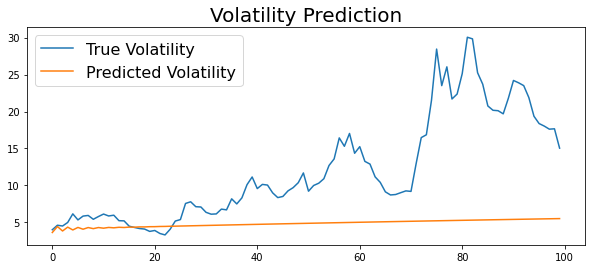

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


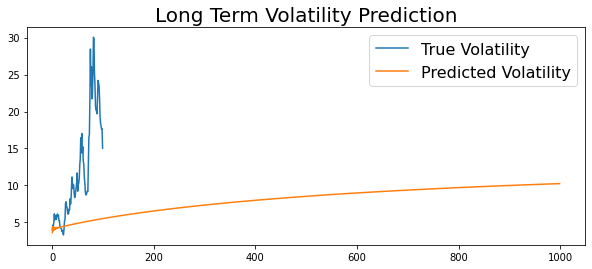

In [ ]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [ ]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

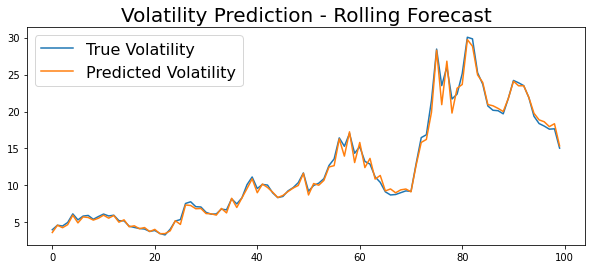

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [ ]:
series = [gauss(0,1), gauss(0,1)]

In [ ]:
series

[-0.38167187988813767, -0.07332651407908804]